## BIOINFORMATICS THESIS: MULTIMODAL NEURAL NETWORK

# CELL LINE: K562

In [1]:
import pandas as pd 
import numpy as np
import os

import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from collections import defaultdict, OrderedDict
import pickle

import sqlite3
from sqlalchemy import create_engine

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
# create a database to store optuna studies with sqlite backend
#engine = create_engine('sqlite:///BIOINF_optuna_tuning.db')

In [3]:
from BIOINF_tesi.data_pipe import CELL_LINES, TASKS

In [4]:
cell_line = CELL_LINES[5]
cell_line

'K562'

---

In [5]:
from BIOINF_tesi.data_pipe import Load_Create_Task
from BIOINF_tesi.data_pipe import Build_DataLoader_Pipeline

In [7]:
from BIOINF_tesi.models import FFNN, CNN, CNN_LSTM
from BIOINF_tesi.models.utils import fit, Param_Search, Kfold_CV, plot_scores

In [7]:
with open ('results_dict.pickle', 'rb') as fin:
    results_dict = pickle.load(fin)
    results_dict = defaultdict(lambda: defaultdict(dict), results_dict)

## 1) ACTIVE ENHANCERS vs INACTIVE ENHANCERS

In [8]:
task = TASKS[0]
task

'active_E_vs_inactive_E'

In [9]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


### 1. FFNN

In [10]:
model=FFNN

In [11]:
# IMBALANCED
type_augm_genfeatures = 'smote'

kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                rebalancing=True,
                type_augm_genfeatures=type_augm_genfeatures,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}_TEST')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:17,955] Using an existing study with name 'K562_active_E_vs_inactive_E_FFNN_smote_1' instead of creating a new one.
/opt/anaconda3/lib/python3.8/site-packages/optuna/structs.py:18: FutureWarning: `structs` is deprecated. Classes have moved to the following modules. `structs.StudyDirection`->`study.StudyDirection`, `structs.StudySummary`->`study.StudySummary`, `structs.FrozenTrial`->`trial.FrozenTrial`, `structs.TrialState`->`trial.TrialState`, `structs.TrialPruned`->`exceptions.TrialPruned`.
  warnings.warn(_message, FutureWarning)


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.13861021234374168
  Params: 
    dropout_l0: 0.2
    lr: 4.496830135760936e-05
    n_layers: 1
    n_units_l0: 64
    optimizer: Nadam
    weight_decay: 0.07753309189387532

===============> MODEL TESTING
AUPRC test score: 0.13205896146857302


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:19,386] Using an existing study with name 'K562_active_E_vs_inactive_E_FFNN_smote_1_2' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.08748239436619722
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.3
    dropout_l2: 0.5
    lr: 0.017763418858336533
    n_layers: 3
    n_units_l0: 256
    n_units_l1: 64
    n_units_l2: 64
    optimizer: RMSprop
    weight_decay: 0.0003227191369429108

===============> MODEL TESTING
AUPRC test score: 0.17485585000170564


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:20,734] Using an existing study with name 'K562_active_E_vs_inactive_E_FFNN_smote_1_2_3' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.15907638075008804
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.4
    dropout_l2: 0.0
    lr: 3.891108536290205e-05
    n_layers: 3
    n_units_l0: 64
    n_units_l1: 64
    n_units_l2: 32
    optimizer: RMSprop
    weight_decay: 0.0009862765076491997

===============> MODEL TESTING
AUPRC test score: 0.16145775108191054



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.15612


In [12]:
results_dict[cell_line][task][f'{model.__name__}_{type_augm_genfeatures}'] = kf_CV.scores_dict

In [13]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

In [14]:
# IMBALANCED
type_augm_genfeatures = 'double'

kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                rebalancing=True,
                type_augm_genfeatures=type_augm_genfeatures,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_{type_augm_genfeatures}_TEST')

>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:21,763] Using an existing study with name 'K562_active_E_vs_inactive_E_FFNN_double_1' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.16197792747002746
  Params: 
    dropout_l0: 0.2
    lr: 0.00012028090535809403
    n_layers: 1
    n_units_l0: 128
    optimizer: RMSprop
    weight_decay: 0.01620646565837296

===============> MODEL TESTING
AUPRC test score: 0.16311524764265714


>>> ITERATION N. 2


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:22,161] Using an existing study with name 'K562_active_E_vs_inactive_E_FFNN_double_1_2' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.1680795756805088
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.0
    dropout_l2: 0.0
    dropout_l3: 0.4
    lr: 0.005828798772148541
    n_layers: 4
    n_units_l0: 256
    n_units_l1: 128
    n_units_l2: 16
    n_units_l3: 16
    optimizer: Adam
    weight_decay: 0.00043064515666016385

===============> MODEL TESTING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:22,548] Using an existing study with name 'K562_active_E_vs_inactive_E_FFNN_double_1_2_3' instead of creating a new one.


AUPRC test score: 0.17203830655801022


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.1828160480803533
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.2
    dropout_l2: 0.5
    lr: 0.01373981558615264
    n_layers: 3
    n_units_l0: 64
    n_units_l1: 128
    n_units_l2: 64
    optimizer: RMSprop
    weight_decay: 0.0001511965897094776

===============> MODEL TESTING
AUPRC test score: 0.10636966493441681



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.14717


In [15]:
results_dict[cell_line][task][f'{model.__name__}_{type_augm_genfeatures}'] = kf_CV.scores_dict

In [16]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [17]:
model=CNN

In [18]:
# IMBALANCED
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                rebalancing=True,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:22,889] Using an existing study with name 'K562_active_E_vs_inactive_E_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.09672807318831325
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.5
    kernel_size_l0: 5
    kernel_size_l1: 5
    lr: 5.860844990278421e-05
    n_layers: 2
    optimizer: Nadam
    out_channels_l0: 16
    out_channels_l1: 32
    weight_decay: 0.0004471972911206199

===============> MODEL TESTING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:23,137] Using an existing study with name 'K562_active_E_vs_inactive_E_CNN_1_2' instead of creating a new one.


AUPRC test score: 0.0938416621847121


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.10409813880247991
  Params: 
    dropout_l0: 0
    dropout_l1: 0.5
    dropout_l2: 0.5
    kernel_size_l0: 5
    kernel_size_l1: 15
    kernel_size_l2: 11
    lr: 0.0008573663278416317
    n_layers: 3
    optimizer: Adam
    out_channels_l0: 32
    out_channels_l1: 64
    out_channels_l2: 64
    weight_decay: 0.0008457504910347888

===============> MODEL TESTING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:23,360] Using an existing study with name 'K562_active_E_vs_inactive_E_CNN_1_2_3' instead of creating a new one.


AUPRC test score: 0.10700360791542411


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.09885490499419419
  Params: 
    dropout_l0: 0
    kernel_size_l0: 5
    lr: 0.0004624916299522377
    n_layers: 1
    optimizer: RMSprop
    out_channels_l0: 16
    weight_decay: 0.03887450496714792

===============> MODEL TESTING
AUPRC test score: 0.08617179741807351



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.09567


In [19]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [20]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 2) ACTIVE PROMOTERS vs INACTIVE PROMOTERS

In [21]:
task = TASKS[1]
task

'active_P_vs_inactive_P'

In [22]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---

### 1. FFNN

In [23]:
model=FFNN

In [24]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

>>> ITERATION N. 1


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:24,378] Using an existing study with name 'K562_active_P_vs_inactive_P_FFNN_1' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.3462949775668635
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.3
    lr: 0.0001639030020193242
    n_layers: 2
    n_units_l0: 256
    n_units_l1: 128
    optimizer: Adam
    weight_decay: 0.0001099651233531117

===============> MODEL TESTING
AUPRC test score: 0.35297561973610686


>>> ITERATION N. 2


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:24,887] Using an existing study with name 'K562_active_P_vs_inactive_P_FFNN_1_2' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.34025817815475007
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.3
    lr: 0.0005213264668784428
    n_layers: 2
    n_units_l0: 64
    n_units_l1: 128
    optimizer: Adam
    weight_decay: 0.0007827073978775232

===============> MODEL TESTING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:25,254] Using an existing study with name 'K562_active_P_vs_inactive_P_FFNN_1_2_3' instead of creating a new one.


AUPRC test score: 0.3482127133882047


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.1312596339837236
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.2
    dropout_l2: 0.0
    lr: 1.028921694274926e-05
    n_layers: 3
    n_units_l0: 64
    n_units_l1: 128
    n_units_l2: 16
    optimizer: RMSprop
    weight_decay: 0.022453369914131507

===============> MODEL TESTING
AUPRC test score: 0.16695421647225367



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.28938


In [25]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [26]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [27]:
model=CNN

In [28]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

>>> ITERATION N. 1


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:25,515] Using an existing study with name 'K562_active_P_vs_inactive_P_CNN_1' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.23819194998630996
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0
    kernel_size_l0: 5
    kernel_size_l1: 5
    lr: 0.0027022020537939145
    n_layers: 2
    optimizer: Nadam
    out_channels_l0: 16
    out_channels_l1: 32
    weight_decay: 0.0030706631721653618

===============> MODEL TESTING
AUPRC test score: 0.2339605494032059


>>> ITERATION N. 2


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:25,729] Using an existing study with name 'K562_active_P_vs_inactive_P_CNN_1_2' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.20396069255166918
  Params: 
    dropout_l0: 0
    dropout_l1: 0
    kernel_size_l0: 11
    kernel_size_l1: 5
    lr: 1.0069750847495368e-05
    n_layers: 2
    optimizer: Nadam
    out_channels_l0: 16
    out_channels_l1: 64
    weight_decay: 0.015848392145378438

===============> MODEL TESTING
AUPRC test score: 0.2021318476416643


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:25,897] Using an existing study with name 'K562_active_P_vs_inactive_P_CNN_1_2_3' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.24844796603333708
  Params: 
    dropout_l0: 0.3
    kernel_size_l0: 11
    lr: 0.0031527649209093034
    n_layers: 1
    optimizer: Adam
    out_channels_l0: 64
    weight_decay: 0.00044860548918871013

===============> MODEL TESTING
AUPRC test score: 0.24195604181140212



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.22602


In [29]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [30]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 3) ACTIVE ENHANCERS vs ACTIVE PROMOTERS

In [31]:
task = TASKS[2]
task

'active_E_vs_active_P'

In [32]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### 1. FFNN

In [33]:
model=FFNN

In [34]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:26,316] Using an existing study with name 'K562_active_E_vs_active_P_FFNN_1' instead of creating a new one.
/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:26,413] Using an existing study with name 'K562_active_E_vs_active_P_FFNN_1_2' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.7974051397589108
  Params: 
    dropout_l0: 0.2
    lr: 0.015548488251772245
    n_layers: 1
    n_units_l0: 128
    optimizer: Adam
    weight_decay: 0.0006615660039962391

===============> MODEL TESTING
AUPRC test score: 0.7574873553695822


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.8063492321521744
  Params: 
    dropout_l0: 0.0
    dropout_l1: 0.0
    dropout_l2: 0.0
    dropout_l3: 0.0
    lr: 0.00024150535209240323
    n_layers: 4
    n_units_l0: 32
    n_units_l1: 32
    n_units_l2: 32
    n_units_l3: 16
    optimizer: Adam
    weight_decay: 0.0002291305142604275

===============> MODEL TESTING
AUPRC test score: 0.8081377232693927




/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:26,504] Using an existing study with name 'K562_active_E_vs_active_P_FFNN_1_2_3' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.7582116810297906
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.3
    dropout_l2: 0.0
    dropout_l3: 0.0
    lr: 0.0017232667779949508
    n_layers: 4
    n_units_l0: 256
    n_units_l1: 64
    n_units_l2: 32
    n_units_l3: 4
    optimizer: Nadam
    weight_decay: 0.00023304579785823218

===============> MODEL TESTING
AUPRC test score: 0.8048812285939689



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.79017


In [35]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [36]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [37]:
model=CNN

In [38]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:26,606] Using an existing study with name 'K562_active_E_vs_active_P_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5151761687115588
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.4
    dropout_l2: 0
    kernel_size_l0: 5
    kernel_size_l1: 5
    kernel_size_l2: 15
    lr: 0.021681536915752683
    n_layers: 3
    optimizer: RMSprop
    out_channels_l0: 16
    out_channels_l1: 64
    out_channels_l2: 256
    weight_decay: 0.0419591703040397

===============> MODEL TESTING
AUPRC test score: 0.3127419354838709




/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:26,828] Using an existing study with name 'K562_active_E_vs_active_P_CNN_1_2' instead of creating a new one.


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.7123528015642018
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0
    kernel_size_l0: 15
    kernel_size_l1: 5
    lr: 0.0005517211984944772
    n_layers: 2
    optimizer: Adam
    out_channels_l0: 32
    out_channels_l1: 64
    weight_decay: 0.027013291582296612

===============> MODEL TESTING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:26,979] Using an existing study with name 'K562_active_E_vs_active_P_CNN_1_2_3' instead of creating a new one.


AUPRC test score: 0.695046125447867


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.7512711775914562
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.4
    dropout_l2: 0
    dropout_l3: 0
    kernel_size_l0: 5
    kernel_size_l1: 11
    kernel_size_l2: 5
    kernel_size_l3: 15
    lr: 0.004373386569316851
    n_layers: 4
    optimizer: Adam
    out_channels_l0: 16
    out_channels_l1: 96
    out_channels_l2: 128
    out_channels_l3: 256
    weight_decay: 0.0010154843912017033

===============> MODEL TESTING
AUPRC test score: 0.7295328074024247



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.57911


In [39]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [40]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 4) INACTIVE ENHANCERS vs INACTIVE PROMOTERS

In [41]:
task = TASKS[3]
task

'inactive_E_vs_inactive_P'

In [42]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### 1. FFNN

In [43]:
model=FFNN

In [44]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

>>> ITERATION N. 1


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:28,966] Using an existing study with name 'K562_inactive_E_vs_inactive_P_FFNN_1' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5707663050887488
  Params: 
    dropout_l0: 0.0
    dropout_l1: 0.4
    dropout_l2: 0.0
    lr: 0.00097510473377239
    n_layers: 3
    n_units_l0: 32
    n_units_l1: 16
    n_units_l2: 32
    optimizer: Adam
    weight_decay: 0.010576309768188704

===============> MODEL TESTING
AUPRC test score: 0.5631192524318143


>>> ITERATION N. 2


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:29,991] Using an existing study with name 'K562_inactive_E_vs_inactive_P_FFNN_1_2' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5673555278823246
  Params: 
    dropout_l0: 0.4
    dropout_l1: 0.0
    dropout_l2: 0.0
    lr: 8.511910865692941e-05
    n_layers: 3
    n_units_l0: 256
    n_units_l1: 32
    n_units_l2: 64
    optimizer: Nadam
    weight_decay: 0.009428628956688064

===============> MODEL TESTING
AUPRC test score: 0.5712788601465019


>>> ITERATION N. 3


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:30,678] Using an existing study with name 'K562_inactive_E_vs_inactive_P_FFNN_1_2_3' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5659568773465478
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.3
    lr: 0.0001670063847371949
    n_layers: 2
    n_units_l0: 256
    n_units_l1: 32
    optimizer: Nadam
    weight_decay: 0.004064442389538894

===============> MODEL TESTING
AUPRC test score: 0.5766967412737221



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.57036


In [45]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [46]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [47]:
model=CNN

In [48]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:31,105] Using an existing study with name 'K562_inactive_E_vs_inactive_P_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5581483148173945
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.4
    dropout_l2: 0
    kernel_size_l0: 15
    kernel_size_l1: 5
    kernel_size_l2: 11
    lr: 0.00015232663328485792
    n_layers: 3
    optimizer: RMSprop
    out_channels_l0: 32
    out_channels_l1: 32
    out_channels_l2: 96
    weight_decay: 0.013337937257722015

===============> MODEL TESTING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:31,287] Using an existing study with name 'K562_inactive_E_vs_inactive_P_CNN_1_2' instead of creating a new one.


AUPRC test score: 0.568979032879536


>>> ITERATION N. 2

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5552052128974312
  Params: 
    dropout_l0: 0.4
    kernel_size_l0: 5
    lr: 1.6000155652018827e-05
    n_layers: 1
    optimizer: RMSprop
    out_channels_l0: 16
    weight_decay: 0.006639313521203149

===============> MODEL TESTING
AUPRC test score: 0.5650134383437307


>>> ITERATION N. 3

===============> HYPERPARAMETERS TUNING


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:31,434] Using an existing study with name 'K562_inactive_E_vs_inactive_P_CNN_1_2_3' instead of creating a new one.


Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.5728102802030217
  Params: 
    dropout_l0: 0.2
    dropout_l1: 0.5
    dropout_l2: 0.4
    dropout_l3: 0.5
    kernel_size_l0: 5
    kernel_size_l1: 5
    kernel_size_l2: 11
    kernel_size_l3: 15
    lr: 0.00016607975331972227
    n_layers: 4
    optimizer: Nadam
    out_channels_l0: 64
    out_channels_l1: 32
    out_channels_l2: 64
    out_channels_l3: 512
    weight_decay: 0.008277611566868029

===============> MODEL TESTING
AUPRC test score: 0.4631413520363631



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.53238


In [49]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [50]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

## 5) ACTIVE ENHANCERS + ACTIVE PROMOTERS vs INACTIVE REST

In [51]:
task = TASKS[4]
task

'active_EP_vs_inactive_rest'

In [52]:
pipe_data_load = Build_DataLoader_Pipeline(path_name=f'{task}.pickle')

Data Preprocessing Done!


---
### 1. FFNN

In [53]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=False,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

>>> ITERATION N. 1


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:33,238] Using an existing study with name 'K562_active_EP_vs_inactive_rest_CNN_1' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.17132706521457908
  Params: 
    dropout_l0: 0.4
    kernel_size_l0: 5
    lr: 0.0005296136108290213
    n_layers: 1
    optimizer: Adam
    out_channels_l0: 32
    weight_decay: 0.07164263550489237

===============> MODEL TESTING
AUPRC test score: 0.11259920634920634


>>> ITERATION N. 2


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:34,365] Using an existing study with name 'K562_active_EP_vs_inactive_rest_CNN_1_2' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.21359955577802422
  Params: 
    dropout_l0: 0
    dropout_l1: 0
    dropout_l2: 0.5
    kernel_size_l0: 11
    kernel_size_l1: 5
    kernel_size_l2: 15
    lr: 0.0006152383646310618
    n_layers: 3
    optimizer: Nadam
    out_channels_l0: 32
    out_channels_l1: 96
    out_channels_l2: 64
    weight_decay: 0.0013348267490916406

===============> MODEL TESTING
AUPRC test score: 0.14636821543639758


>>> ITERATION N. 3


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:35,274] Using an existing study with name 'K562_active_EP_vs_inactive_rest_CNN_1_2_3' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.17546190198398293
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.5
    kernel_size_l0: 5
    kernel_size_l1: 15
    lr: 0.009887234238778717
    n_layers: 2
    optimizer: Adam
    out_channels_l0: 32
    out_channels_l1: 64
    weight_decay: 0.025708404925933796

===============> MODEL TESTING
AUPRC test score: 0.11011537859824784



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.12303


In [54]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [55]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---
### 2. CNN

In [56]:
model=CNN

In [57]:
kf_CV = Kfold_CV()

kf_CV(build_dataloader_pipeline = pipe_data_load,
                num_epochs = 100,
                n_folds=3,
                cell_line=cell_line,
                sequence=True,
                rebalancing=False,
                model = model,
                device = device,
                task=task,
                sampler = 'TPE',
                study_name = f'{cell_line}_{task}_{model.__name__}',
                hp_model_path = f'{cell_line}_{task}_{model.__name__}_HP',
                test_model_path = f'{cell_line}_{task}_{model.__name__}_TEST')

/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:35,822] Using an existing study with name 'K562_active_EP_vs_inactive_rest_CNN_1' instead of creating a new one.


>>> ITERATION N. 1

===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.17132706521457908
  Params: 
    dropout_l0: 0.4
    kernel_size_l0: 5
    lr: 0.0005296136108290213
    n_layers: 1
    optimizer: Adam
    out_channels_l0: 32
    weight_decay: 0.07164263550489237

===============> MODEL TESTING
AUPRC test score: 0.11259920634920634


>>> ITERATION N. 2


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:36,030] Using an existing study with name 'K562_active_EP_vs_inactive_rest_CNN_1_2' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.21359955577802422
  Params: 
    dropout_l0: 0
    dropout_l1: 0
    dropout_l2: 0.5
    kernel_size_l0: 11
    kernel_size_l1: 5
    kernel_size_l2: 15
    lr: 0.0006152383646310618
    n_layers: 3
    optimizer: Nadam
    out_channels_l0: 32
    out_channels_l1: 96
    out_channels_l2: 64
    weight_decay: 0.0013348267490916406

===============> MODEL TESTING
AUPRC test score: 0.14636821543639758


>>> ITERATION N. 3


/Users/Niki/Prediction-of-Active-and-Inactive-Regulatory-Regions-with-Embracenet-Multimodal-Neural-Network-/BIOINF_tesi/models/utils/training_models.py:370: ExperimentalWarning: PatientPruner is experimental (supported from v2.8.0). The interface can change in the future.
  pruner=optuna.pruners.PatientPruner(optuna.pruners.MedianPruner(), patience=2),
[I 2021-10-13 13:25:36,197] Using an existing study with name 'K562_active_EP_vs_inactive_rest_CNN_1_2_3' instead of creating a new one.



===============> HYPERPARAMETERS TUNING
Study statistics: 
  Number of finished trials:  3
  Number of pruned trials:  0
  Number of complete trials:  3
Best trial:
  Value:  0.17546190198398293
  Params: 
    dropout_l0: 0.3
    dropout_l1: 0.5
    kernel_size_l0: 5
    kernel_size_l1: 15
    lr: 0.009887234238778717
    n_layers: 2
    optimizer: Adam
    out_channels_l0: 32
    out_channels_l1: 64
    weight_decay: 0.025708404925933796

===============> MODEL TESTING
AUPRC test score: 0.11011537859824784



3-FOLD CROSS-VALIDATION AUPRC TEST SCORE: 0.12303


In [58]:
results_dict[cell_line][task][model.__name__] = kf_CV.scores_dict

In [59]:
with open ('results_dict.pickle', 'wb') as fout:
    pickle.dump(OrderedDict(results_dict), fout)

---

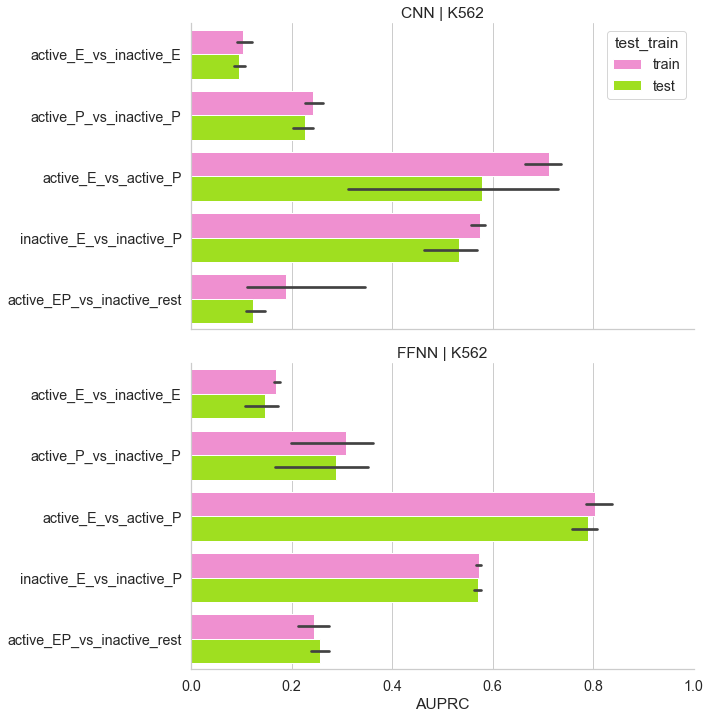

In [8]:
plot_scores(cells=cell_line, models=['FFNN','CNN'])